In [59]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

print("Python version: ", sys.version)
print("Pandas version: ", pd.__version__)
print("Working Directory: ", os.getcwd())

Python version:  3.9.5 (default, May 18 2021, 19:34:48) 
[GCC 7.3.0]
Pandas version:  1.2.4
Working Directory:  /home/laura/RealEstate


In [11]:
loc_appns = pd.read_csv("Land_Use_Redesignation_Applications.csv", parse_dates=['AppliedDate','CompletedDate'])

In [12]:
loc_appns.head()

,PermitType,PermitNum,Description,StatusCurrent,AppliedDate,CompletedDate,Applicant,FromLUD,ProposedLUD,Address,LocationAddresses,LocationCount,Latitude,Longitude,multipoint
0,LU / OP / Closure (LOC),LOC1982-0001,Converted Job - Land Use Amendment,Cancelled,1982-01-05,1999-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LU / OP / Closure (LOC),LOC1982-0002,Converted Job - Land Use Amendment,Approved,1982-01-18,1982-07-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LU / OP / Closure (LOC),LOC1982-0003,Converted Job - Land Use Amendment,Approved,1982-01-08,1982-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LU / OP / Closure (LOC),LOC1982-0004,Converted Job - Land Use Amendment,Approved,1982-02-01,1982-07-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LU / OP / Closure (LOC),LOC1995-0032,Converted Job - Land Use Amendment,Under Review,1995-04-17,NaT,GENERIC CONTRACTOR BUSINESS - ID,NaN,NaN,6060 86 AV SE,NaN,NaN,NaN,NaN,NaN


Field Descriptions  
![Fields From City Site: https://data.calgary.ca/dataset/Land-Use-Redesignation-Applications/33vi-ew4s](FieldDescriptions.png)

In [14]:
loc_appns.describe(include='all',datetime_is_numeric=True)

,PermitType,PermitNum,Description,StatusCurrent,AppliedDate,CompletedDate,Applicant,FromLUD,ProposedLUD,Address,LocationAddresses,LocationCount,Latitude,Longitude,multipoint
count,7521,7521,7491,7521,7521,7135,2914,2600,2600,5517,5109,5109.000000,5109.000000,5109.000000,5109
unique,1,7521,906,7,NaN,NaN,586,526,542,4212,4420,NaN,NaN,NaN,4521
top,LU / OP / Closure (LOC),LOC2017-0155,Converted Job - Land Use Amendment,Approved,NaN,NaN,BROWN & ASSOCIATES PLANNING GROUP,R-C1,R-C1s,10333 80 AV NW,10333 80 AV NW,NaN,NaN,NaN,MULTIPOINT ((-114.248491099701 51.124965842303))
freq,7521,1,2572,6053,NaN,NaN,382,634,545,12,7,NaN,NaN,NaN,7
mean,NaN,NaN,NaN,NaN,2002-05-26 11:39:36.545672064,2002-12-13 06:23:15.599159168,NaN,NaN,NaN,NaN,NaN,3.445097,51.041928,-114.076363,NaN
min,NaN,NaN,NaN,NaN,1982-01-05 00:00:00,1982-02-22 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,50.843723,-114.298791,NaN
25%,NaN,NaN,NaN,NaN,1991-07-26 00:00:00,1992-04-08 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,51.009178,-114.127129,NaN
50%,NaN,NaN,NaN,NaN,2001-03-29 00:00:00,2002-02-11 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,51.043844,-114.074335,NaN
75%,NaN,NaN,NaN,NaN,2014-12-15 00:00:00,2015-06-23 12:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,51.081672,-114.026098,NaN
max,NaN,NaN,NaN,NaN,2021-10-29 00:00:00,2021-10-14 00:00:00,NaN,NaN,NaN,NaN,NaN,1367.000000,51.204242,-113.866670,NaN


In [15]:
# Change data types as needed
loc_appns.dtypes

PermitType                   object
PermitNum                    object
Description                  object
StatusCurrent                object
AppliedDate          datetime64[ns]
CompletedDate        datetime64[ns]
Applicant                    object
FromLUD                      object
ProposedLUD                  object
Address                      object
LocationAddresses            object
LocationCount               float64
Latitude                    float64
Longitude                   float64
multipoint                   object
dtype: object

No type conversion needed, note that the polygon of the geo column isn't parsed, which is fine in this context

In [40]:
#Subset to 2007 or newer
loc_appns_newer = loc_appns.copy()
loc_appns_newer = loc_appns_newer.loc[loc_appns_newer.CompletedDate >= '2007-01-01']
loc_appns_newer.sort_values(by='CompletedDate',axis=0, inplace=True)

In [41]:
loc_appns_newer.shape

(2934, 15)

In [42]:
# Drop rows where both from and to LUD are NaN
loc_appns_newer.dropna(subset=['FromLUD','ProposedLUD'],how='any', inplace=True)
loc_appns_newer.shape

(2400, 15)

In [43]:
loc_appns_newer.describe(include='all',datetime_is_numeric=True)

,PermitType,PermitNum,Description,StatusCurrent,AppliedDate,CompletedDate,Applicant,FromLUD,ProposedLUD,Address,LocationAddresses,LocationCount,Latitude,Longitude,multipoint
count,2400,2400,2386,2400,2400,2400,1702,2400,2400,2317,2311,2311.000000,2311.000000,2311.000000,2311
unique,1,2400,474,4,NaN,NaN,403,490,504,2134,2214,NaN,NaN,NaN,2233
top,LU / OP / Closure (LOC),LOC2011-0085,Land Use Amendment,Approved,NaN,NaN,BROWN & ASSOCIATES PLANNING GROUP,R-C1,R-C1s,507 210 AV SW,19515 SHERIFF KING ST SW,NaN,NaN,NaN,MULTIPOINT ((-114.135672808374 51.183854153376))
freq,2400,1,973,2067,NaN,NaN,215,616,542,4,4,NaN,NaN,NaN,3
mean,NaN,NaN,NaN,NaN,2016-03-01 03:34:12,2016-11-22 21:42:35.999999744,NaN,NaN,NaN,NaN,NaN,4.611856,51.045156,-114.076188,NaN
min,NaN,NaN,NaN,NaN,2009-01-06 00:00:00,2009-01-23 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,50.851690,-114.298791,NaN
25%,NaN,NaN,NaN,NaN,2014-05-09 00:00:00,2015-03-11 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,51.014914,-114.126504,NaN
50%,NaN,NaN,NaN,NaN,2016-09-07 12:00:00,2017-05-11 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,51.048476,-114.078187,NaN
75%,NaN,NaN,NaN,NaN,2018-04-17 06:00:00,2019-01-17 00:00:00,NaN,NaN,NaN,NaN,NaN,2.000000,51.085472,-114.028527,NaN
max,NaN,NaN,NaN,NaN,2021-10-01 00:00:00,2021-10-14 00:00:00,NaN,NaN,NaN,NaN,NaN,1367.000000,51.202937,-113.866670,NaN


In [37]:
loc_appns_newer.head()

,PermitType,PermitNum,Description,StatusCurrent,AppliedDate,CompletedDate,Applicant,FromLUD,ProposedLUD,Address,LocationAddresses,LocationCount,Latitude,Longitude,multipoint
2829,LU / OP / Closure (LOC),LOC2009-0005,Road Closure with Redesignation,Cancelled,2009-01-20,2009-01-23,MAIDMENT LAND SURVEYS,Undesignated Road Ri,DC/S-R,NaN,NaN,NaN,NaN,NaN,NaN
2827,LU / OP / Closure (LOC),LOC2009-0002,Land Use Amendment,Approved,2009-01-06,2009-03-12,CITY OF CALGARY (THE),S-FUD,S-CRI,1455 AIRPORT TR NE,1455 AIRPORT TR NE,1.0,51.139703,-114.031135,MULTIPOINT ((-114.03113503106 51.139703103099))
2833,LU / OP / Closure (LOC),LOC2009-0017,Land Use Amendment,Cancelled,2009-02-24,2009-04-22,NaN,R-C1,R-C1s,219 HAWKTREE CI NW,219 HAWKTREE CI NW,1.0,51.136754,-114.165488,MULTIPOINT ((-114.165488025589 51.13675353545))
2843,LU / OP / Closure (LOC),LOC2009-0049,NaN,Cancelled,2009-05-20,2009-05-21,BROWN & ASSOCIATES PLANNING GROUP,C-COR2 f3.0 h46;M-C1;S-CS;S-CS;C-R2 f3.0,DC/C-COR1;DC/C-COR1;DC/C-COR1;DC/M-H3;DC/M-H3,NaN,NaN,NaN,NaN,NaN,NaN
5535,LU / OP / Closure (LOC),LOC2009-0016,Land Use Amendment to accommodate a phased dev...,Approved,2009-02-24,2009-05-22,INTERPLAN STRATEGIES,DC;DC,M-1;S-CI,782 85 ST SW,782 85 ST SW;822 85 ST SW,2.0,51.063816,-114.210766,MULTIPOINT ((-114.210765623045 51.063815738639...


In [44]:
loc_appns_newer.StatusCurrent.unique()

array(['Cancelled', 'Approved', 'Refused', 'Under Review'], dtype=object)

In [57]:
loc_appns_newer=loc_appns_newer.astype({'StatusCurrent':'category'})

<AxesSubplot:>

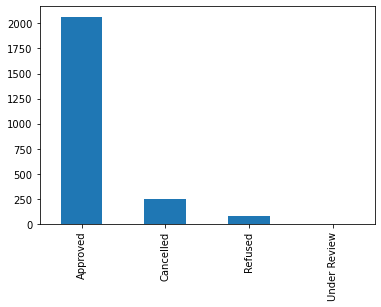

In [62]:
loc_appns_newer.StatusCurrent.value_counts().plot(kind='bar')

In [64]:
statusfracs = loc_appns_newer.StatusCurrent.value_counts(normalize=True)
print(statusfracs*100)

Approved        86.125000
Cancelled       10.500000
Refused          3.333333
Under Review     0.041667
Name: StatusCurrent, dtype: float64


In [80]:
loc_appns_newer.FromLUD=loc_appns_newer.FromLUD.str.lower()

In [85]:
# Remove any rows with FromLUD containing 'road' (Couldn't do it on Description because Description has some NaNs in it)
land_only = loc_appns_newer[~loc_appns_newer.FromLUD.str.contains('road')]

In [83]:
land_only.shape

(2261, 15)